In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
import scienceplots

plt.style.use(['science', 'nature'])

In [2]:
df = pd.read_excel("./QualClust_Disfute_tableau_HX.xlsx")
df

,Cutoffs of citations,Module,Avg_entropy,#Articles
0,0,4,0.2792,175749
1,0,1,0.2763,149787
2,0,2,0.2557,38886
3,0,3,0.2737,44268
4,10,4,0.2990,161652
5,10,1,0.2887,141930
6,10,2,0.2674,36775
7,10,3,0.2901,41232
8,100,4,0.4501,45278
9,100,1,0.3750,58369


In [3]:
df.groupby("Module")["Avg_entropy"].mean()

Module
1    0.375056
2    0.335022
3    0.442811
4    0.440489
Name: Avg_entropy, dtype: float64

C:\Users\17469\AppData\Local\Temp\ipykernel_12956\1369555030.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  sub_axes.set_xticklabels([0, 10, 100, 500, 1000])


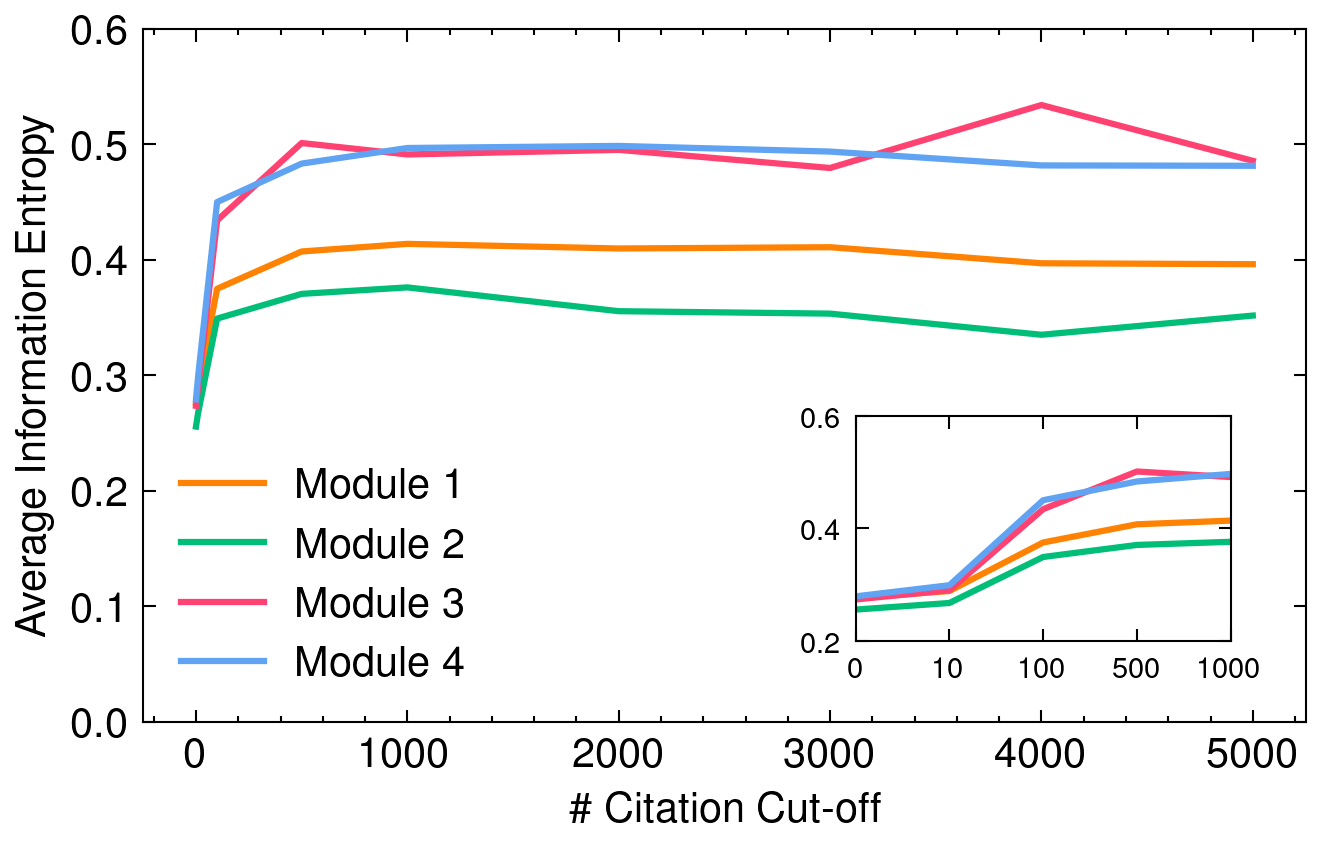

In [6]:
plt.figure(dpi=300, figsize=(5,3))
sns.set_palette("tab10")
colors = ["#FF8202", "#00BE77", "#FF4272", "#5FA3F2"]
for i in range(1, 5):
    df_temp = df[df["Module"] == i]
    plt.plot(df_temp["Cutoffs of citations"], df_temp["Avg_entropy"], label=f"Module {i}", lw=1.5, color=colors[i-1])
plt.ylim(0, 0.6)
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("\# Citation Cut-off", fontsize=10)
plt.ylabel("Average Information Entropy", fontsize=10)
ax = plt.gca()
ax.yaxis.set_minor_locator(ticker.NullLocator())  # 删除子刻度
# 子图
sub_axes = plt.axes([0.6, 0.2, 0.25, 0.25])  # 调整子图的位置和大小
df_pre = df[df["Cutoffs of citations"] <= 1000]
x_uniform = np.linspace(0, 1000, 5)
for i in range(1, 5):
    df_temp = df_pre[df_pre["Module"] == i]
    sub_axes.plot(x_uniform, df_temp["Avg_entropy"], label=f"Module {i}", lw=1.5, color=colors[i-1])
sub_axes.set_xlim(0, 1000)  # 设置子图的x范围
sub_axes.set_ylim(0.2, 0.6)
sub_axes.set_xticklabels([0, 10, 100, 500, 1000])
# 设置x轴刻度定位器，保留主刻度，删除子刻度
# sub_axes.xaxis.set_major_locator(ticker.MultipleLocator(base=1.0))  # 主刻度间隔为1
sub_axes.xaxis.set_minor_locator(ticker.NullLocator())  # 删除子刻度
sub_axes.yaxis.set_minor_locator(ticker.NullLocator())  # 删除子刻度
plt.show()